# Model Comparison

To compare models, we will first optimize the parameters of two diffrent models and look at how the different parameters settings impact the model comparison.  Later, we'll see how to compare across models of different classes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster
from sklearn import svm
from sklearn import tree
# import the whole model selection module
from sklearn import model_selection
sns.set_theme(palette='colorblind')

We'll use the iris data again.

In [2]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

Remember, we need to split the data into training and test.  The cross validation step will hep us optimize the parameters, but we don't want *data leakage* where the model has seen the test data multiple times. So, we split the data here for train and test annd the cross validation splits the training data into train and "test" again, but this test is better termed validation.

In [3]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = model_selection.train_test_split(
    iris_X,iris_y, test_size =.2)

Then we can make the object, the parameter grid dictionary and the Grid Search object.  We split these into separate cells, so that we can use the built in help to see more detail.

In [4]:
dt = tree.DecisionTreeClassifier()

In [5]:
params_dt = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4],
       'min_samples_leaf':list(range(2,20,2))}

In [6]:
dt_opt = model_selection.GridSearchCV(dt,params_dt)

Then we fit the Grid search using the training data, and remember this actually resets the parameters and then cross validates multiple times.

In [7]:
dt_opt.fit(iris_X_train,iris_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]})

adn look at the results

In [8]:
dt_opt.cv_results_

{'mean_fit_time': array([0.00057373, 0.00045094, 0.00045662, 0.00045428, 0.00045586,
        0.0004509 , 0.0004519 , 0.00044351, 0.00045424, 0.0004776 ,
        0.00046754, 0.00046496, 0.0004704 , 0.00046616, 0.000458  ,
        0.0004581 , 0.00045366, 0.0004518 , 0.00046992, 0.00047083,
        0.00046387, 0.00046868, 0.00046897, 0.00045934, 0.00045857,
        0.00045519, 0.00045323, 0.00046425, 0.00045586, 0.00046659,
        0.00046291, 0.00046024, 0.0004581 , 0.00045366, 0.00044961,
        0.00045786, 0.00047617, 0.00047207, 0.00048261, 0.00047388,
        0.00046539, 0.00046673, 0.00047088, 0.0004632 , 0.00045094,
        0.00047827, 0.00048547, 0.00047755, 0.0004694 , 0.00046792,
        0.00047359, 0.00047388, 0.00045795, 0.00045838]),
 'std_fit_time': array([1.50833445e-04, 1.16484984e-05, 1.08467615e-05, 9.16048736e-06,
        1.81373712e-05, 4.05563949e-06, 9.02671758e-06, 1.51439157e-05,
        8.80975200e-06, 1.12025277e-05, 7.77551672e-06, 1.24548551e-05,
        1.143

We can reformat it into a dataframe for further analysis.

In [9]:
dt_df = pd.DataFrame(dt_opt.cv_results_)
dt_df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000574,0.000151,0.000259,0.000045,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.791667,0.958333,0.958333,1.0,0.875,0.916667,0.074536,1
1,0.000451,0.000012,0.000228,0.000004,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.791667,0.958333,0.958333,1.0,0.875,0.916667,0.074536,1


```{admonition} Correction
The parameters in this function were in the wrong 
order in this function in class
```
I changed the markers and the color of the error bars for readability.

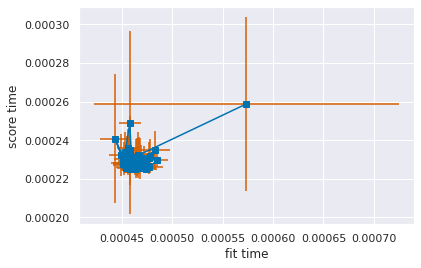

In [10]:
plt.errorbar(x=dt_df['mean_fit_time'],y=dt_df['mean_score_time'],
     xerr=dt_df['std_fit_time'],yerr=dt_df['std_score_time'],
             marker='s',ecolor='r')
plt.xlabel('fit time')
plt.ylabel('score time')
# save the limits so we can reuse them
xmin, xmax, ymin, ymax = plt.axis()

The "points" are at the mean fit and score times. The lines are the "standard deviation" or how much we expect that number to vary, since means are an estimate. 
Because the data shows an upward trend, this plot tells us that mostly, the models that are slower to fit are also slower to apply. This makes sense for decision trees, deeper trees take longer to learn and longer to traverse when predicting. 
Because the error bars mostly overlap the other points, this tells us that mostly the variation in time is not a reliable difference. If we re-ran the GridSearch, we could get them in different orders. 

To interpret the error bar plot, let's look at a line plot of just the means, with the same limits so that it's easier to compare to the plot above.

(0.00040781367964773456, 0.0007396472578522655)

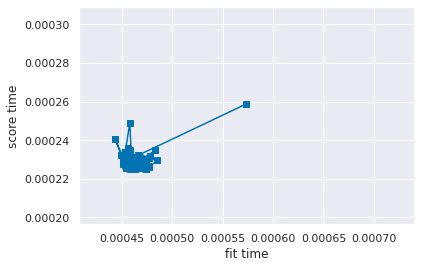

In [11]:
plt.plot(dt_df['mean_fit_time'],
            dt_df['mean_score_time'], marker='s')
plt.xlabel('fit time')
plt.ylabel('score time')
# match the axis limits to above
plt.ylim(ymin, ymax)
plt.xlim(xmin,xmax)

this plot shows the mean times, without the error bars.

<AxesSubplot:>

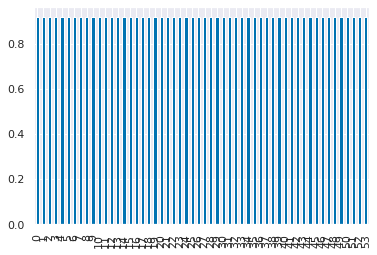

In [12]:
dt_df['mean_test_score'].plot(kind='bar')

In [13]:
dt_df['mean_test_score']

0     0.916667
1     0.916667
2     0.916667
3     0.916667
4     0.916667
5     0.916667
6     0.916667
7     0.916667
8     0.916667
9     0.916667
10    0.916667
11    0.916667
12    0.916667
13    0.916667
14    0.916667
15    0.916667
16    0.916667
17    0.916667
18    0.916667
19    0.916667
20    0.916667
21    0.916667
22    0.916667
23    0.916667
24    0.916667
25    0.916667
26    0.916667
27    0.916667
28    0.916667
29    0.916667
30    0.916667
31    0.916667
32    0.916667
33    0.916667
34    0.916667
35    0.916667
36    0.916667
37    0.916667
38    0.916667
39    0.916667
40    0.916667
41    0.916667
42    0.916667
43    0.916667
44    0.916667
45    0.916667
46    0.916667
47    0.916667
48    0.916667
49    0.916667
50    0.916667
51    0.916667
52    0.916667
53    0.916667
Name: mean_test_score, dtype: float64

Now let's compare with a different model, we'll use the parameter optimized version for that model.

In [14]:
svm_clf = svm.SVC()
param_grid = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}
svm_opt = GridSearchCV(svm_clf,param_grid,)

NameError: name 'GridSearchCV' is not defined

The error above is because we didn't import `GridSearchCV` directly today, we imported the whole `model_selection` module, so we have to use that in order to access the class.

In [15]:
svm_clf = svm.SVC()
param_grid = {'kernel':['linear','rbf'], 'C':[.5, .75,1,2,5,7, 10]}
svm_opt = model_selection.GridSearchCV(svm_clf,param_grid,cv=10)

In [16]:
type(model_selection)

module

In [17]:
dt_opt.__dict__

{'scoring': None,
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'refit': True,
 'cv': None,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': [2, 3, 4],
  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
 'multimetric_': False,
 'best_index_': 0,
 'best_score_': 0.9166666666666667,
 'best_params_': {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2},
 'best_estimator_': DecisionTreeClassifier(max_depth=2, min_samples_leaf=2),
 'refit_time_': 0.0003337860107421875,
 'scorer_': <function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
 'cv_results_': {'mean_fit_time': array([0.00057373, 0.00045094, 0.00045662, 0.00045428, 0.00045586,
         0.0004509 , 0.0004519 , 0.00044351, 0.00045424, 0.0004776 ,
         0.00046754, 0.00046496, 0.0004704 , 0.00046616, 0.000458  ,
         0.0004581 , 0.00045366, 0.0004518 , 0.00046992, 0.

This doesn't have attributes yet, even though they are the same type, because we have not fit it tot data yet.

In [18]:
type(svm_opt), type(dt_opt)

(sklearn.model_selection._search.GridSearchCV,
 sklearn.model_selection._search.GridSearchCV)

Now we can fit the model to the training data of this second model.

In [19]:
# fit the model and  put the CV results in a dataframe
svm_opt.fit(iris_X_train,iris_y_train)
sv_df = pd.DataFrame(svm_opt.cv_results_)

In [20]:
sv_df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000661,0.000077,0.000288,0.000018,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",1.0,0.916667,1.0,0.916667,1.0,1.000000,1.0,1.0,0.916667,1.000000,0.975000,0.038188,1
1,0.000746,0.000025,0.000318,0.000016,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",1.0,0.833333,1.0,0.916667,1.0,0.916667,1.0,1.0,1.000000,0.916667,0.958333,0.055902,10


<ErrorbarContainer object of 3 artists>

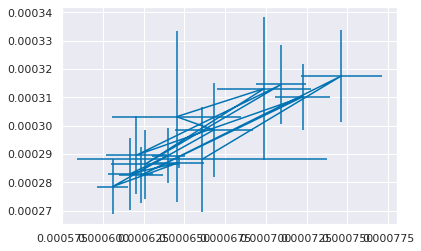

In [21]:
plt.errorbar(x=sv_df['mean_fit_time'],xerr=sv_df['std_fit_time'],
            y=sv_df['mean_score_time'],yerr=sv_df['std_score_time'])

In [22]:
sv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

We can see if the models that take longer to fit or score perform better.

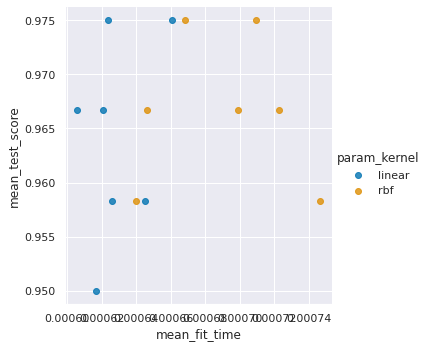

In [23]:
svm_time = sv_df.melt(id_vars=['param_C', 'param_kernel', 'params',],
                      value_vars=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'])
sns.lmplot(data=sv_df, x='mean_fit_time',y='mean_test_score',
          hue='param_kernel',fit_reg=False)

This looks like mostly no.

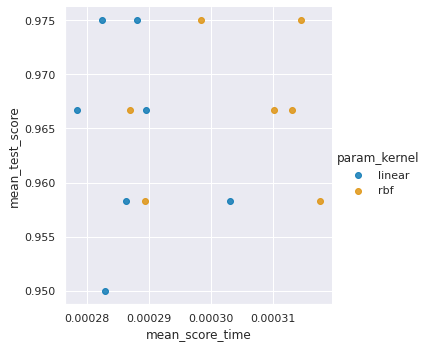

In [24]:
sns.lmplot(data=sv_df, x='mean_score_time',y='mean_test_score',
          hue='param_kernel',fit_reg=False)

Again, for score time, the slower models don't appear to be better.  Remember though the time differences weren't that different. 

```{admonition} Try it yourself
Try this same analysis for the decision tree, does it matter there?
```

In [25]:
sv_df_scores = sv_df.melt(id_vars=['param_C', 'param_kernel', 'params',],
                    value_vars=['split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score'], value_name='score')
sv_df_scores.head()

,param_C,param_kernel,params,variable,score
0,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",split0_test_score,1.0
1,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",split0_test_score,1.0
2,0.75,linear,"{'C': 0.75, 'kernel': 'linear'}",split0_test_score,1.0
3,0.75,rbf,"{'C': 0.75, 'kernel': 'rbf'}",split0_test_score,1.0
4,1,linear,"{'C': 1, 'kernel': 'linear'}",split0_test_score,1.0


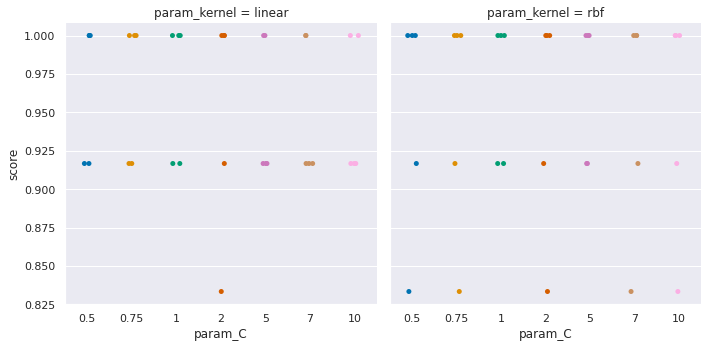

In [26]:
sns.catplot(data=sv_df_scores,x='param_C',y='score',
            col='param_kernel')

```{admonition} Try it yourself
Try interpretting the plot above, what does it say? what can you conclude from it. 
```

<AxesSubplot:>

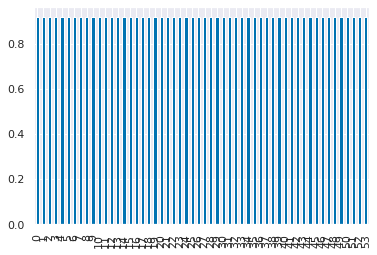

In [27]:
dt_df['mean_test_score'].plot(kind='bar')

<AxesSubplot:>

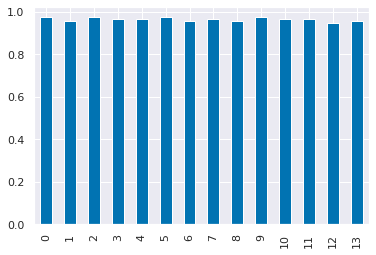

In [28]:
sv_df['mean_test_score'].plot(kind='bar')

From these last two plots we see that the SVM performance is more sensitive to its parameters, where for the parameters tested, the decision tree is not impacted. 

What can we say based on this?  We'll pick up from here on Wednesday.